In [1]:
import numpy as np
import skimage
from skimage import io
from skimage.color import rgb2hsv
from skimage.morphology import binary_closing
import os
import matplotlib.pyplot as plt
import scipy

In [11]:
def seg_mask(img,squared=False):
    hsv_i=rgb2hsv(img)
    h=hsv_i[:,:,0]
    h_b=np.logical_and(h>0.2,h<0.4)
    
    #Erosion and dilation
    disk=skimage.morphology.disk(5)
    hl=np.ones((1,100)).astype('uint8')
    cimg=skimage.morphology.erosion(h_b,disk)
    cimg=binary_closing(cimg,hl)
    cimg=binary_closing(cimg,hl.T)

    limg=skimage.measure.label(cimg)
    props=skimage.measure.regionprops(limg)

    cimg=((limg==np.argmax(np.vectorize(lambda p:p.area)(np.array(props)))+1)).astype("int")

    #Fill
    mask=scipy.ndimage.binary_fill_holes(cimg).astype("int")
    
    x_min=np.min(np.where(mask==1)[0])
    y_min=np.min(np.where(mask==1)[1])
    x_max=np.max(np.where(mask==1)[0])
    y_max=np.max(np.where(mask==1)[1])
    
    #if squared:
    smk=np.zeros(mask.shape)
        
    if (x_max-x_min)>(y_max-y_min):
        d=np.floor((abs((y_max-y_min)-(x_max-x_min)))/2)
        dL=d
        dR=d+2*((abs((y_max-y_min)-(x_max-x_min)))/2-d)
        if y_min==0:
            y_max=int(y_max+dR+dL)
        elif y_max==smk.shape[0] or y_max==smk.shape[1]:
            y_min=int(y_min-dL-dR)
        else:
            y_min=int(y_min-dL)
            y_max=int(y_max+dR)
    else:
        d=np.floor((abs((y_max-y_min)-(x_max-x_min))/2))
        dL=d
        dR=d+2*((abs((y_max-y_min)-(x_max-x_min)))/2-d)
        if x_min==0:
            x_max=int(x_max+dR+dL)
        elif x_max==smk.shape[0] or x_max==smk.shape[1]:
            x_min=int(x_min-dL-dR)
        else:
            x_min=int(x_min-dL)
            x_max=int(x_max+dR)
    
    if squared:
        smk[x_min:x_max,y_min:y_max]=1
        mask=smk.astype("int")
        
    return mask,x_max,x_min,y_max,y_min

In [9]:
!ls ../../Labeled

11_junio_1  14_abril_2	  19_agosto   23_junio_1    28_abril_1	2_junio
12_mayo_1   14_julio_1	  19_mayo_1   23_junio_2    28_abril_2	5_agosto
12_mayo_2   15_setiembre  19_mayo_2   24_setiembre  29_marzo_1	7_mayo
13_agosto   16_junio_1	  23_julio_1  26_mayo_1     29_marzo_2	9_julio
14_abril_1  16_junio_2	  23_julio_2  26_mayo_2     2_julio


In [6]:
DB="../../Labeled"
Dates=os.listdir(DB)
print(Dates)

['11_junio_1', '7_mayo', '5_agosto', '12_mayo_2', '23_junio_2', '23_julio_2', '15_setiembre', '13_agosto', '9_julio', '28_abril_2', '19_agosto', '23_junio_1', '14_julio_1', '28_abril_1', '29_marzo_1', '14_abril_2', '23_julio_1', '24_setiembre', '26_mayo_1', '19_mayo_1', '26_mayo_2', '14_abril_1', '12_mayo_1', '2_junio', '16_junio_1', '29_marzo_2', '19_mayo_2', '16_junio_2', '2_julio']


In [24]:
date_ID=-3
print(Dates[date_ID])
img_ID=16
d=os.path.join(DB,Dates[date_ID])
#img_dir=os.path.join(d,os.listdir(d)[os.listdir(d)=='19_mayo_2__arbol_21_fila_A.JPG'])
img_dir=os.path.join(d,'19_mayo_2__arbol_21_fila_A.JPG')
print(img_dir)
img=io.imread(img_dir)

19_mayo_2
../../Labeled/19_mayo_2/19_mayo_2__arbol_21_fila_A.JPG


Text(0.5, 1.0, 'Segmented image')

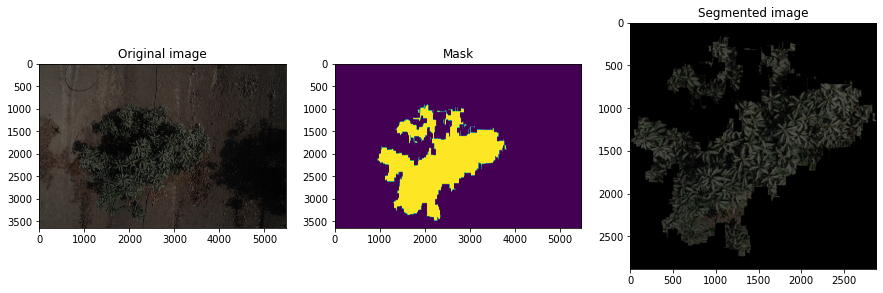

In [25]:
mk,x_max,x_min,y_max,y_min=seg_mask(img,squared=False)
simg=(np.stack((mk,mk,mk),axis=2))*img

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
ax1.imshow(img)
ax1.set_title('Original image')
ax2.imshow(mk)
ax2.set_title('Mask')
ax3.imshow(simg[x_min:x_max,y_min:y_max,:])
ax3.set_title('Segmented image')

Text(0.5, 1.0, 'Segmented image')

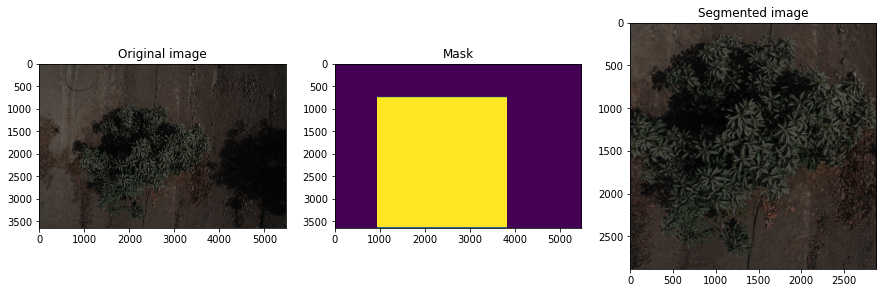

In [26]:
mk,x_max,x_min,y_max,y_min=seg_mask(img,squared=True)
simg=(np.stack((mk,mk,mk),axis=2))*img

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
ax1.imshow(img)
ax1.set_title('Original image')
ax2.imshow(mk)
ax2.set_title('Mask')
ax3.imshow(simg[x_min:x_max,y_min:y_max,:])
ax3.set_title('Segmented image')